In [63]:
import numpy as np 
import pandas as pd
from Visualizer import Visualizer
import matplotlib.pyplot as plt

In [73]:
train_ds=r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\Datasets\farm_insects\farm_insects_training"
test_ds=r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\Datasets\farm_insects\farm_insects_test"

Randomly selected image: Image_32.jpg
Image shape: (513, 616, 3)
The class in the image is:Thrips


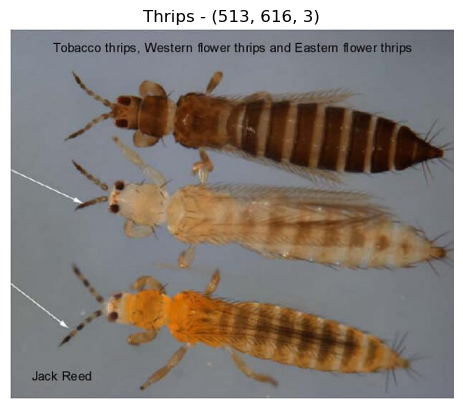

Randomly selected image: Image_58.jpg
Image shape: (836, 1254, 3)
The class in the image is:Aphids


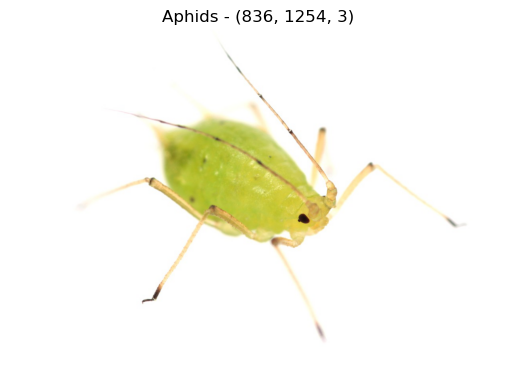

Randomly selected image: Image_94.jpg
Image shape: (640, 425, 3)
The class in the image is:Africanized Honey Bees (Killer Bees)


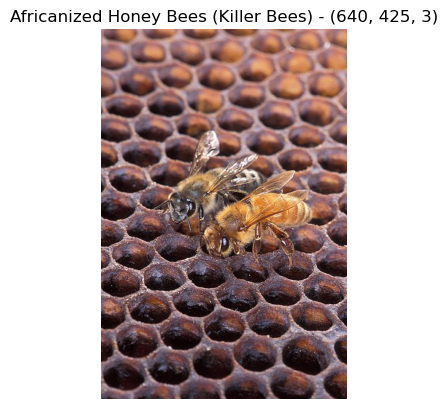

Randomly selected image: Image_28.jpg
Image shape: (567, 600, 3)
The class in the image is:Tomato Hornworms


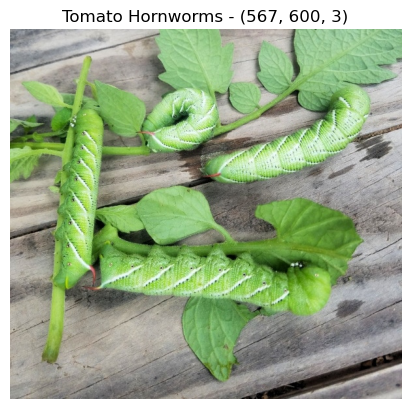

Randomly selected image: Image_24.jpg
Image shape: (1096, 1042, 3)
The class in the image is:Armyworms


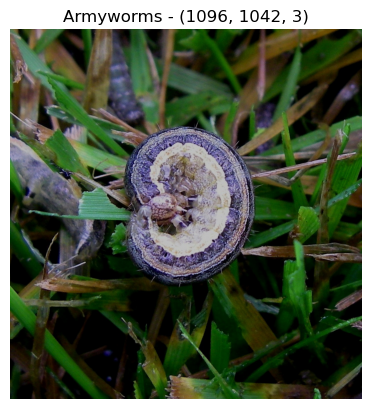

Randomly selected image: Image_23.jpg
Image shape: (186, 300, 3)
The class in the image is:Brown Marmorated Stink Bugs


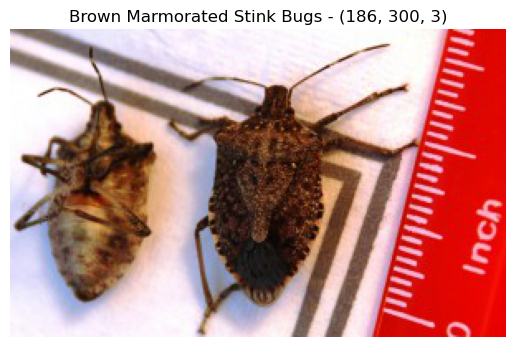

Randomly selected image: Image_55.jpg
Image shape: (465, 600, 3)
The class in the image is:Corn Borers


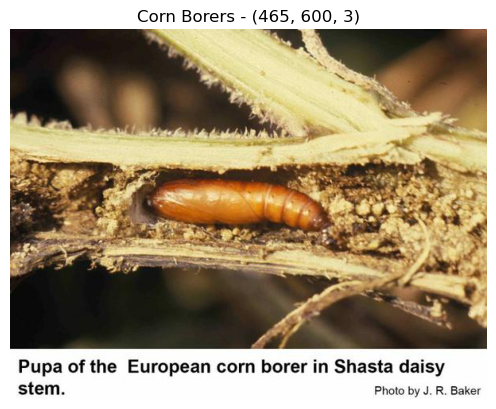

Randomly selected image: Image_69.jpg
Image shape: (450, 600, 3)
The class in the image is:Spider Mites


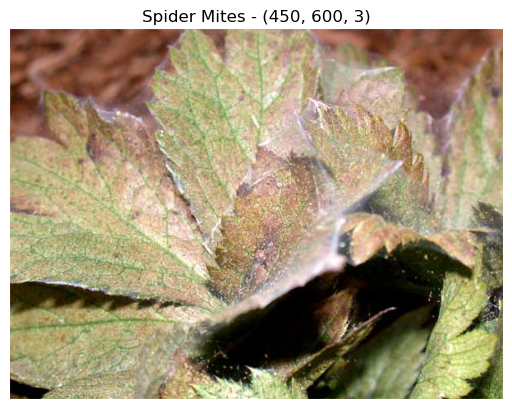

Randomly selected image: Image_3.jpeg
Image shape: (877, 1237, 3)
The class in the image is:Cabbage Loopers


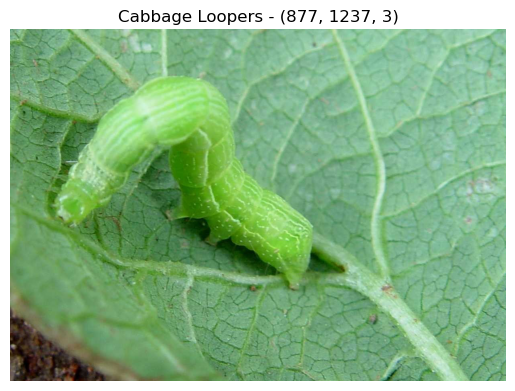

Randomly selected image: Image_49.jpg
Image shape: (670, 900, 3)
The class in the image is:Citrus Canker


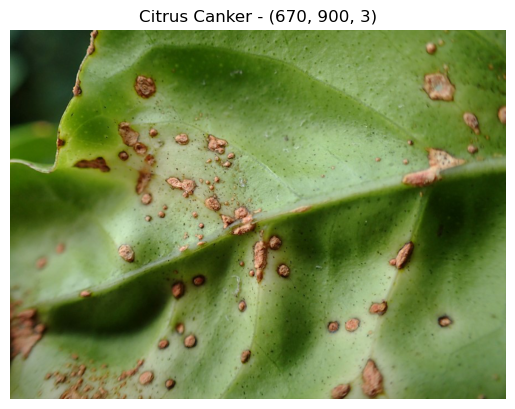

Randomly selected image: Image_86.jpg
Image shape: (1150, 1600, 3)
The class in the image is:Colorado Potato Beetles


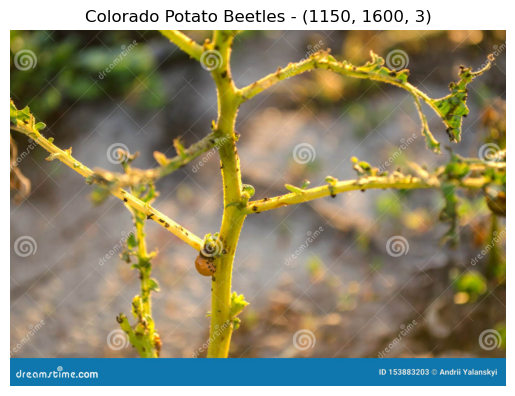

Randomly selected image: Image_70.jpg
Image shape: (400, 648, 3)
The class in the image is:Fruit flies


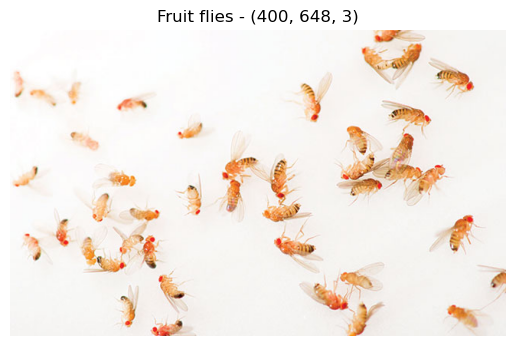

Randomly selected image: Image_73.jpg
Image shape: (769, 1152, 3)
The class in the image is:Corn Earworms


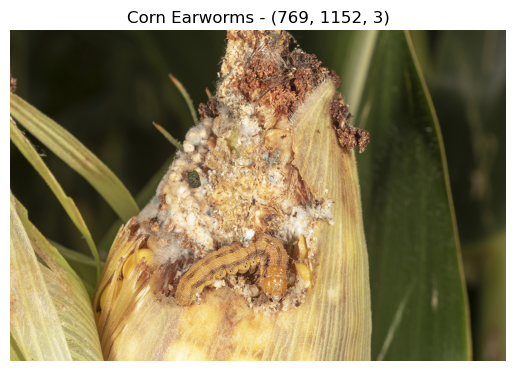

In [65]:
# List of your class names
class_names = [
    "Thrips", "Aphids", "Africanized Honey Bees (Killer Bees)", "Tomato Hornworms", 
    "Armyworms", "Brown Marmorated Stink Bugs" ,"Corn Borers",
    "Spider Mites", "Cabbage Loopers", "Citrus Canker", "Colorado Potato Beetles",
    "Fruit flies", "Corn Earworms"
]

# Loop through all classes and show a random image
for cls in class_names:
    vs.view_random_image(train_ds, target_class=cls)


In [ ]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
# Normalize the pixel values (0–1)
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))


In [78]:
# Normalize the pixel values (0–1)
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))


In [46]:
vs=Visualizer()

###Test 2

In [ ]:
import tensorflow as tf

train_dir=r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\Datasets\farm_insects\farm_insects_training"

# Create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    subset="training",
    validation_split=0.2,
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    subset="validation",
    validation_split=0.2,
    seed=123,
    image_size=(224, 224),
    batch_size=32
)




Found 1351 files belonging to 14 classes.
Using 1081 files for training.
Found 1351 files belonging to 14 classes.
Using 270 files for validation.
Found 126 files belonging to 14 classes.


In [181]:
test_dir=r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\Datasets\farm_insects\farm_insects_test"

# Create test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32
)

Found 126 files belonging to 14 classes.


In [182]:
test_ds.class_names


['Africanized Honey Bees (Killer Bees)',
 'Aphids',
 'Armyworms',
 'Brown Marorated Stink Bugs',
 'Cabbage Loopers',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn Bores',
 'Corn Earworms',
 'Fruit Files',
 'Spider Mites',
 'Thrips',
 'Tomato Hornworms',
 'Western Corn Rootworms']

Africanized Honey Bees (Killer Bees): 88
Aphids: 79
Armyworms: 86
Brown Marmorated Stink Bugs: 105
Cabbage Loopers: 95
Citrus Canker: 95
Colorado Potato Beetles: 103
Corn Borers: 106
Corn Earworms: 101
Fruit Flies: 92
Spider Mites: 110
Thrips: 100
Tomato Hornworms: 100
Western Corn Rootworms: 91


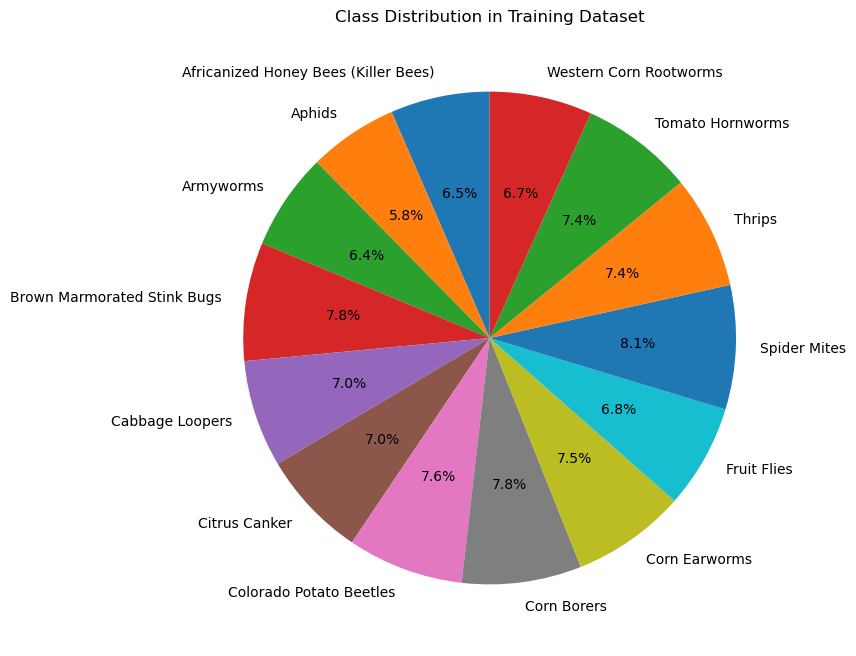

In [164]:
import os
import matplotlib.pyplot as plt



# Get class names (subfolder names)
class_names = sorted(os.listdir(train_dir))

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in class_names}

# Display counts
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Pie chart visualization
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution in Training Dataset")
plt.show()


In [165]:
import tensorflow as tf

# Prefetch datasets
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# Normalize pixel values (0–1)
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

# Data augmentation block
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

# Apply augmentation only to training data
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [120]:
EfficientNet_model = tf.keras.applications.EfficientNetB0(
    weights='imagenet',   # or None if you’ll load your own
    include_top=False,    # exclude the classifier head
    input_shape=(224, 224, 3)
)

In [166]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    alpha=0.35
)


In [158]:
EfficientNet_model.trainable=False 
feat_extr=EfficientNet_model

In [104]:
print(feat_extr)

In [167]:
base_model.trainable=False
feat_extr_MV2=base_model

In [168]:
MODEL_INPUT_SIZE = (224, 224, 3)
global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
dense_layer = tf.keras.layers.Dense(14, activation='softmax')
inputs = tf.keras.Input(shape=MODEL_INPUT_SIZE)
x = feat_extr_MV2(inputs, training=False)
x = global_avg_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = dense_layer(x)
model_MV2 = tf.keras.Model(inputs, outputs)


In [169]:
model_MV2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_0.35_224 (Funct  (None, 7, 7, 1280)       410208    
 ional)                                                          
                                                                 
 global_average_pooling2d_17  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_17 (Dropout)        (None, 1280)              0         
                                                                 
 dense_21 (Dense)            (None, 14)                17934     
                                                                 
Total params: 428,142
Trainable params: 17,934
Non-trainabl

In [171]:
lr = 0.0001
model_MV2.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [172]:
history_MV2=model_MV2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,callbacks=[vs.create_tensorboard_callback(dir_name=TB,experiment_name=exp_name)])

Saving TensorBoard log files to: C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\TensorBoard_Callbacks_dir\ResnetExp\20251030-084316
Epoch 1/100
34/34 [==============================] - 10s 186ms/step - loss: 2.9178 - accuracy: 0.1018 - val_loss: 2.6626 - val_accuracy: 0.1407
Epoch 2/100
34/34 [==============================] - 7s 171ms/step - loss: 2.6965 - accuracy: 0.1434 - val_loss: 2.4992 - val_accuracy: 0.1852
Epoch 3/100
34/34 [==============================] - 7s 181ms/step - loss: 2.5152 - accuracy: 0.1832 - val_loss: 2.3651 - val_accuracy: 0.2593
Epoch 4/100
34/34 [==============================] - 9s 210ms/step - loss: 2.3729 - accuracy: 0.2433 - val_loss: 2.2452 - val_accuracy: 0.2926
Epoch 5/100
34/34 [==============================] - 9s 200ms/step - loss: 2.2608 - accuracy: 0.2914 - val_loss: 2.1480 - val_accuracy: 0.3333
Epoch 6/100
34/34 [==============================] - 8s 200ms/step - loss: 2.1455 - accuracy: 0.3201 - val_loss: 2.0596 - val_accuracy: 0.3667

<Axes: >

<Figure size 800x600 with 0 Axes>

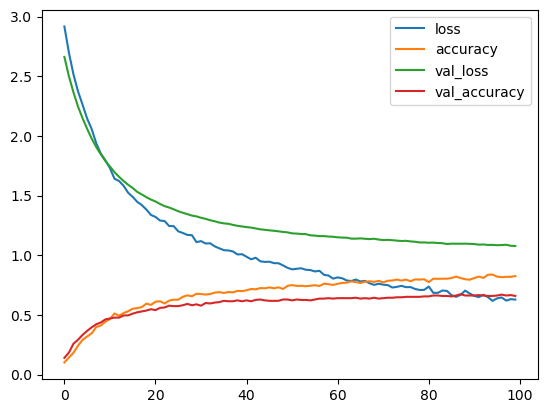

In [173]:
plt.figure(figsize=(8, 6))
pd.DataFrame(history_MV2.history).plot()

<Axes: >

<Figure size 800x600 with 0 Axes>

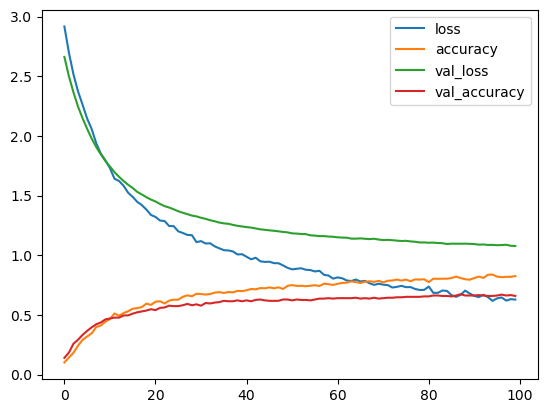

In [318]:
plt.figure(figsize=(8, 6))
pd.DataFrame(history_MV2.history).plot()

In [174]:

base_model.trainable = True

# Freeze all layers except the last 50
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Recompile after changing layer trainability
model_MV2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training (fine-tuning)
history_fine = model_MV2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,callbacks=[vs.create_tensorboard_callback(dir_name=TB,experiment_name=exp_name)]
)


Saving TensorBoard log files to: C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\TensorBoard_Callbacks_dir\ResnetExp\20251030-090235
Epoch 1/30
34/34 [==============================] - 11s 197ms/step - loss: 0.6265 - accuracy: 0.8187 - val_loss: 1.0982 - val_accuracy: 0.6741
Epoch 2/30
34/34 [==============================] - 7s 172ms/step - loss: 0.6047 - accuracy: 0.8187 - val_loss: 1.1083 - val_accuracy: 0.6667
Epoch 3/30
34/34 [==============================] - 8s 201ms/step - loss: 0.5556 - accuracy: 0.8187 - val_loss: 1.1083 - val_accuracy: 0.6667
Epoch 4/30
34/34 [==============================] - 8s 198ms/step - loss: 0.5455 - accuracy: 0.8242 - val_loss: 1.0955 - val_accuracy: 0.6741
Epoch 5/30
34/34 [==============================] - 8s 204ms/step - loss: 0.5423 - accuracy: 0.8335 - val_loss: 1.0986 - val_accuracy: 0.6741
Epoch 6/30
34/34 [==============================] - 8s 201ms/step - loss: 0.5330 - accuracy: 0.8483 - val_loss: 1.1029 - val_accuracy: 0.6593
Epoch

<Axes: >

<Figure size 800x600 with 0 Axes>

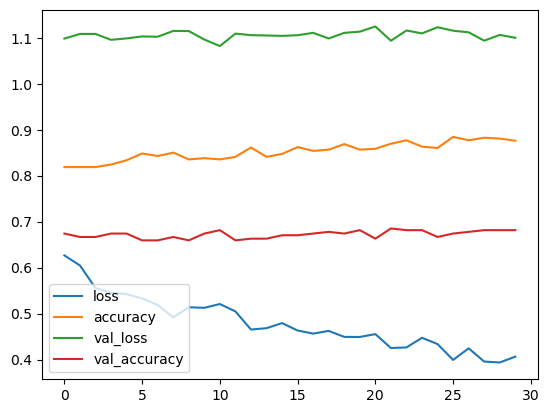

In [175]:
plt.figure(figsize=(8, 6))
pd.DataFrame(history_fine.history).plot()

In [178]:
test_loss, test_acc = model_MV2.evaluate(test_ds)
print("Test Accuracy:", test_acc)


4/4 [==============================] - 1s 35ms/step - loss: 1.1410 - accuracy: 0.7381
Test Accuracy: 0.738095223903656


In [180]:
y=model_MV2.predict(test_ds)
y

4/4 [==============================] - 1s 134ms/step


array([[1.13749970e-03, 2.14736574e-04, 3.46462871e-03, ...,
        1.14000344e-03, 1.61349144e-05, 4.86509991e-04],
       [6.53122202e-04, 2.11311057e-02, 4.30900812e-01, ...,
        1.04155056e-01, 1.96188483e-02, 1.64354324e-01],
       [2.44103461e-07, 2.60250317e-03, 1.72653206e-04, ...,
        2.40831680e-04, 9.10662353e-01, 2.32636576e-05],
       ...,
       [1.57368109e-02, 3.10448813e-05, 3.35394442e-02, ...,
        7.48753024e-04, 9.20885359e-04, 1.10978141e-01],
       [8.48029479e-02, 4.32864390e-03, 7.38931060e-01, ...,
        6.74311025e-03, 4.13128000e-04, 2.89785657e-02],
       [3.21485059e-05, 1.12033995e-05, 7.34693458e-06, ...,
        2.15571446e-04, 9.88293614e-05, 2.48833530e-04]], dtype=float32)

4/4 [==============================] - 1s 86ms/step


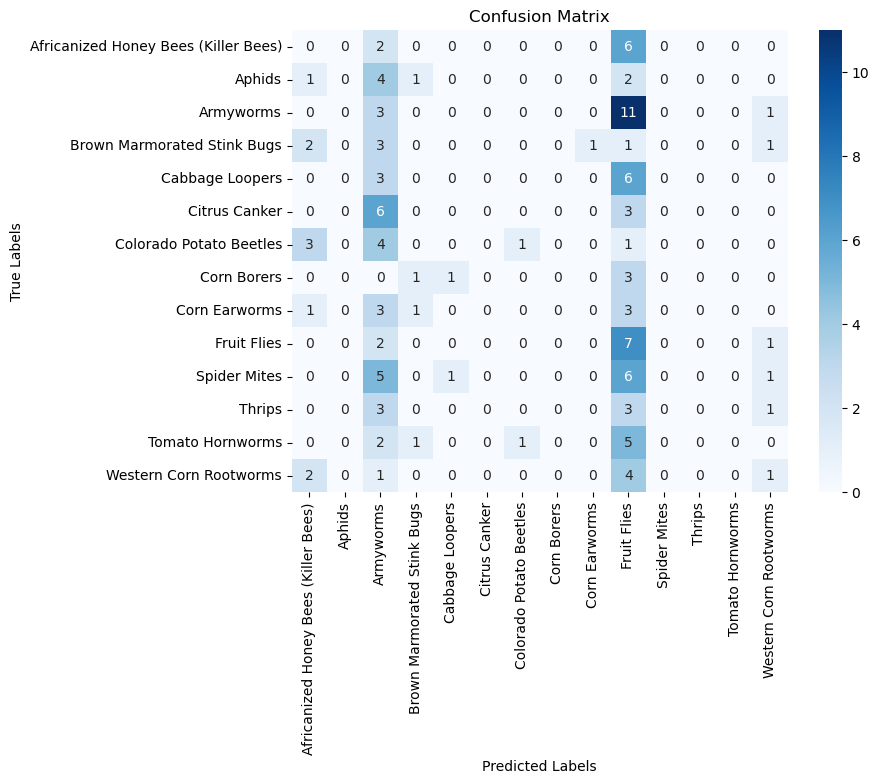

In [187]:
vs.set_model(model_MV2)   # Assign the model to the Visualizer object
vs.plot_confusion_matrix(test_ds, y,class_names)  # Then call the method


In [190]:
model_MV2.save(r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\Transfer Learning Models\model_MV2.h5")

In [204]:
model_MV2=tf.keras.models.load_model(r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\Transfer Learning Models\model_MV2.h5")

In [196]:
model_MV2.predict(test_ds)

4/4 [==============================] - 1s 113ms/step


array([[4.91478574e-03, 2.58937507e-04, 6.79219782e-01, ...,
        8.82658176e-04, 2.65327049e-03, 1.02037951e-01],
       [1.26343131e-01, 1.69103623e-05, 5.29487371e-01, ...,
        4.64429431e-05, 9.09274822e-05, 2.66908765e-01],
       [1.00201510e-01, 3.10977641e-03, 6.94567919e-01, ...,
        6.92901667e-03, 1.42418512e-03, 5.15295845e-03],
       ...,
       [6.19423529e-03, 5.29968820e-04, 5.06290495e-01, ...,
        1.04414644e-02, 3.48239392e-03, 9.71756037e-03],
       [1.47822082e-01, 4.10844060e-03, 5.02398133e-01, ...,
        4.86654928e-03, 1.50135411e-02, 4.42931354e-02],
       [7.74799241e-03, 4.96601642e-05, 5.29162474e-02, ...,
        1.75736402e-03, 7.24958663e-05, 1.10730715e-02]], dtype=float32)

In [264]:
from PIL import Image 
import numpy as np
image_path=r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\Datasets\farm_insects\farm_insects_training\Spider Mites\Image_3.jpg"
try:
    image=Image.open(image_path)
except FileNotFoundError:
    print(f"Error: Image not found at the{image_path}")
    exit()



In [265]:
test_ds.class_names

['Africanized Honey Bees (Killer Bees)',
 'Aphids',
 'Armyworms',
 'Brown Marorated Stink Bugs',
 'Cabbage Loopers',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn Bores',
 'Corn Earworms',
 'Fruit Files',
 'Spider Mites',
 'Thrips',
 'Tomato Hornworms',
 'Western Corn Rootworms']

In [242]:
TARGET_SIZE=(224,224)
img=image.resize(TARGET_SIZE)
img_array=np.array(img)



In [243]:
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [244]:
img_array.shape

(1, 224, 224, 3)

In [245]:
prediction=model_MV2.predict(img_array)
predicted_class_index=np.argmax(prediction[0])

1/1 [==============================] - 0s 28ms/step


In [260]:
prediction*100

array([[1.5132241e-02, 1.5240493e-01, 3.2146920e-03, 1.0684971e-01,
        1.3202314e-04, 1.7482411e-05, 5.7873511e-01, 7.3229638e-04,
        2.5535867e-02, 3.2637551e-01, 9.5346710e+01, 4.7792140e-03,
        2.8283303e-03, 3.4365687e+00]], dtype=float32)

In [246]:
predicted_class_index

10

In [247]:
confidence=prediction[0][predicted_class_index]

In [248]:
confidence

0.9534671

In [261]:
predicted_class_name=class_names[predicted_class_index]

In [262]:
predicted_class_name

'Spider Mites'

In [252]:
print(f"___Prediction Results___")
print(f"Predicted Class:** {predicted_class_name} **")
print(f"confidence: ** {confidence*100:.2f}% **")

___Prediction Results___
Predicted Class:** Spider Mites **
confidence: ** 95.35% **


In [302]:
def Image_Classifier(image_path,model_name,class_names):
    from PIL import Image 
    import numpy as np
    try:
      image=Image.open(image_path)
    except FileNotFoundError:
     print(f"Error: Image not found at the{image_path}")
     exit()

    TARGET_SIZE=(224,224)
    img=image.resize(TARGET_SIZE)
    img_array=np.array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=img_array/255.0
    prediction=model_name.predict(img_array)
    predicted_class_index=np.argmax(prediction[0])
    confidence=prediction[0][predicted_class_index]
    predicted_class_name=class_names[predicted_class_index]

    display=[(f"___Prediction Results___"),(f"Predicted Class:** {predicted_class_name} **"),(f"confidence: ** {confidence*100:.2f}% **")]

    for i in range(2):
     return display
    

In [316]:
image_path=r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\Datasets\farm_insects\farm_insects_test\Corn Bores\Image_105.jpg"

In [317]:
Image_Classifier(image_path,model_MV2,class_names)

1/1 [==============================] - 0s 43ms/step


['___Prediction Results___',
 'Predicted Class:** Corn Earworms **',
 'confidence: ** 89.78% **']

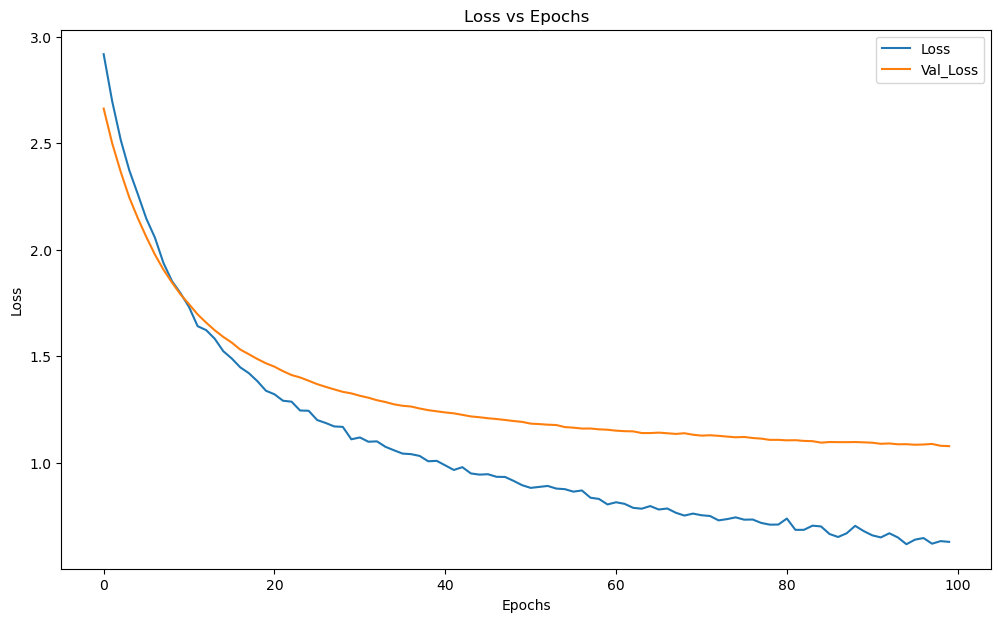

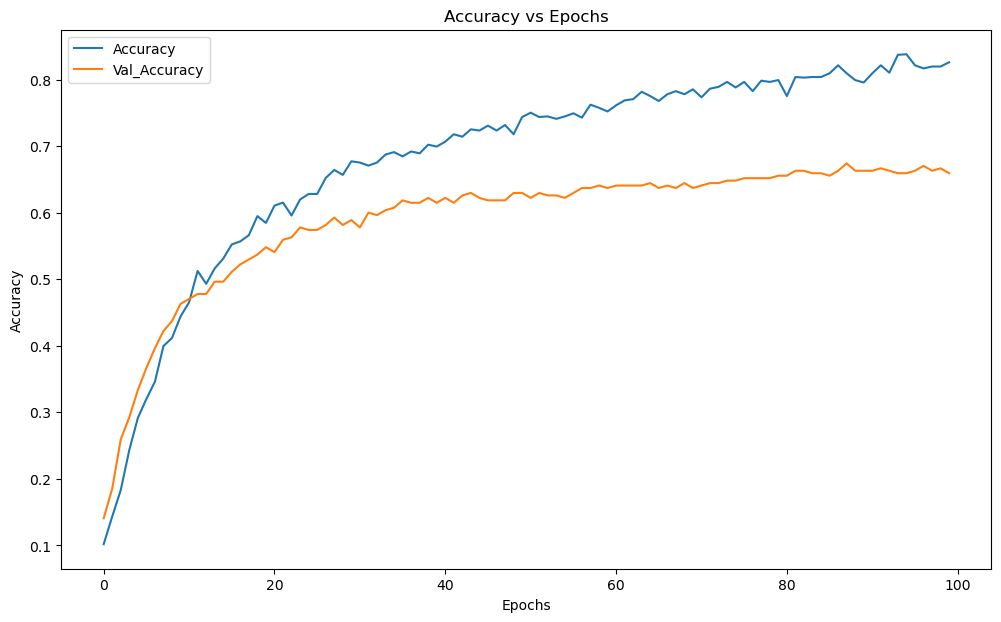

In [320]:
vs.training_curve(history_MV2)

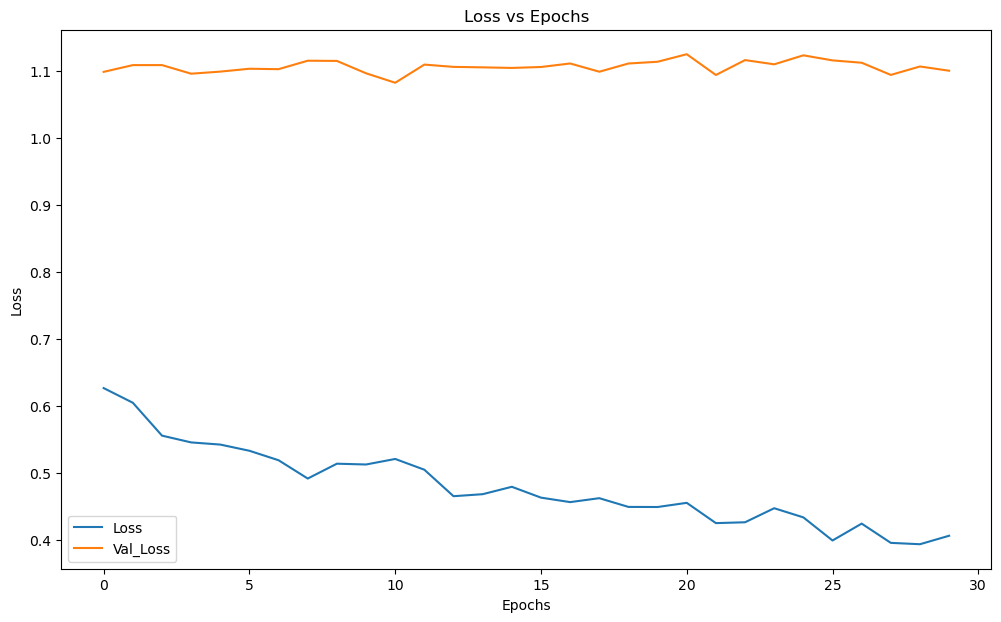

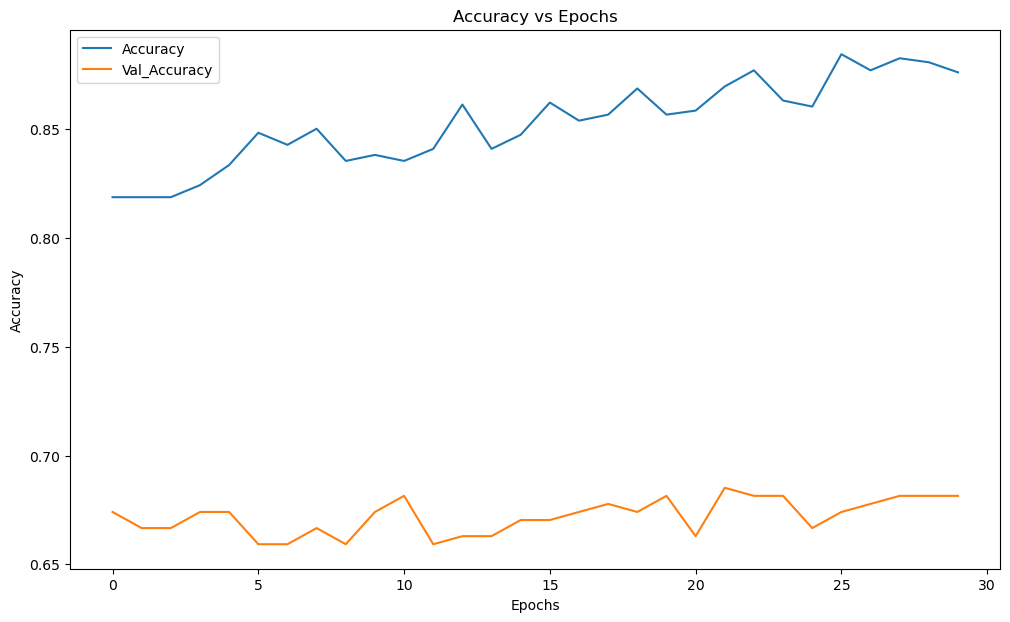

In [321]:
vs.training_curve(history_fine)

In [ ]:
vs.plot_decision_boundary()